<a href="https://colab.research.google.com/github/jade0520/DeepLearning_FromScratch/blob/master/2nd/2_CH07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/WegraLee/deep-learning-from-scratch-2.git

import os
os.chdir('/content/deep-learning-from-scratch-2')

fatal: destination path 'deep-learning-from-scratch-2' already exists and is not an empty directory.


# 7.1 언어모델을 사용한 문장 생성


  언어모델은 기계번역, 음성 인식, 문장 생성 등에 활용 될 수 있다.  

## 7.1.1 RNN을 사용한 문장 생성의 순서

문장 생성시 입력 단어에 대한 새로운 단어를 생성한다. 

  * 결정적 방법 : 확률이 가장 높은 단어 선택
  * 확률적 방법 : 확률 분포를 따르는 랜덤 선택

## 7.1.2 문장 생성 구현



RNN을 상속받아 문장을 생성하는 클라스 구현


: 문장을 생성하는 generate 함수 메서드 구현

In [ ]:
import numpy as np
from common.functions import softmax
from ch06.rnnlm import Rnnlm



class RnnlmGen(Rnnlm): # 클래스 상속
  def generate(self, start_id, skip_ids = None, sample_size = 100):
              # start_id    : 최초로 주는 단어의 id
              # skip_ids    : N,<unk>을 샘플링 하지 않는다.
              # sample_size : sampling할 단어의 개수 

      word_ids = [start_id]   # 최초 단어를 받는다.

      x = start_id

      while len(word_ids) < sample_size:    # sample_size만큼의 단어 생성
          x = np.array(x).reshape(1,1)        # idx를 2차원 행렬로 변환 : predict는 미니배치 처리를 하므로
          score = self.predict(x)           # x다음에 올 단어들의 점수 출력

          p = softmax(score.flatten())      # 일려로 flatten 하여 정규화

          sampled = np.random.choice(len(p), size =1 , p=p)  # 정규화한 분포대로 랜덤 선택을 한다.

          if(skip_ids is None) or (sampled not in skip_ids): # skip_ids가 비어있는 경우나 sampled가 skip_ids가아닌경우에만
            x = sampled                                     # 샘플로 추가
            word_ids.append(int(x))

      return word_ids # 샘플링된 단어들


학습된 RNN으로 문장 생성

--> 듬성듬성 연결이 되기는 하지만 아직 부족하다

In [ ]:
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('ch06/Rnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids]) # 배열을 ' ' 단위로 문자열 생성
txt = txt.replace(' <eos>', '.\n')
print(txt)

you teams this time says frank b. generale operators at first boston eagerness that there recently.
 mr. jones says we 're krasnoyarsk to a sense of people accommodate more than the specified in its films.
 one sassy would become cfcs.
 but mr. corry asked make only prestigious nations of free cooperation as for enormous offices and plants or options will affect existing courts in an alternative big annual challenge without a country.
 hewlett-packard 's two observers save home as long as the mexico board set floor for a account of ford for texas air utilities inc.


## 7.1.3 더 좋은 문장으로


RNN이 아닌 BetterRnn을 상송받아 generate구현 후 문장 생성
--> 저번보다는 자연스러운 문장 그러나 의미적 측면은 아직 좋지 않다.

In [ ]:
import numpy as np
from common.functions import softmax
from ch06.better_rnnlm import BetterRnnlm



class BetterRnnlmGen(Rnnlm): # 클래스 상속
  def generate(self, start_id, skip_ids = None, sample_size = 100):
              # start_id    : 최초로 주는 단어의 id
              # skip_ids    : N,<unk>을 샘플링 하지 않는다.
              # sample_size : sampling할 단어의 개수 

      word_ids = [start_id]   # 최초 단어를 받는다.

      x = start_id

      while len(word_ids) < sample_size:    # sample_size만큼의 단어 생성
          x = np.array(x).reshape(1,1)        # idx를 2차원 행렬로 변환 : predict는 미니배치 처리를 하므로
          score = self.predict(x)           # x다음에 올 단어들의 점수 출력

          p = softmax(score.flatten())      # 일려로 flatten 하여 정규화

          sampled = np.random.choice(len(p), size =1 , p=p)  # 정규화한 분포대로 랜덤 선택을 한다.

          if(skip_ids is None) or (sampled not in skip_ids): # skip_ids가 비어있는 경우나 sampled가 skip_ids가아닌경우에만
            x = sampled                                     # 샘플로 추가
            word_ids.append(int(x))

      return word_ids # 샘플링된 단어들


from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = BetterRnnlmGen()
model.load_params('ch06/Rnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids]) # 배열을 ' ' 단위로 문자열 생성
txt = txt.replace(' <eos>', '.\n')
print(txt)


model.reset_state()

#### the meaning of life is 넣고 결과 받기
start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

# 문장을 입력하여 순전파 :  LSTM 계층에 단어열의 정보가 저장된다.
for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids,sample_size = 10)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

you 'll represent conversations with his husband led as a solution.
 mr. lawson the vehicle by the white house he pulls in the case his test with a succession of hud children mr. chair is a legislative sentence for the agency to make continuing concessions marathon.
 but until mr. roman would have nothing to be translated out.
 he noted that he has to succeed the attack mr. jones.
 mr. roman 's estimates increase violates new returns and between charities and mr. dole announced as he asked.
 home.
 in quarterly income mr. rosen apparently as
--------------------------------------------------
the meaning of life is or trying to take contacts with a check.



# 7.2 seq2seq 
  시계열 데이터 sequence



## 7.2.1 seq2seq의 원리

seq2seq = Encode-Decoder 모델
*인코딩이란, 어떤 정보를 규칙에 따라 변환하는 것

* Encoder : 번역에 필요한 정보 응축

  어떤 문장을 입력 했을 때 Encoder는 은닉상태h 를 출력한다.
이때의 은닉 상태 h는 고정길이 벡터로,
결국 Encoder는 임의 길이의 문장을 고정 길이 벡터로 변환하는 작업이다.


* Decoder : 응축된 정보를 바탕으로 도착어 문장을 생성
  LSTM 계층이 Encoder로 부터 출려된 은닉상태 h를 입력받는다. 
  (이전 까지의 LSTM에서는 입력으로 영벡터를 받음)

* \<eos> 는 Decoder에게 시작/끝을 알리는 역할을 한다.

## 7.2.2 시계열 데이터 변환용 장난감 문제

  * 장난감 문제 : 머신러닝을 평가하고자 만든 간단한 문제
    
           "5 + 3" 을 입력햇을 때, "8"이 나올 수 있을까!

## 7.2.3 가변길이, 시계열 데이터

입력이 다르고 출력이 다르므로. 패딩을 사용하여 입력 및 출력길이를 고정한다.

* 패딩 전용 처리 필요 : 존재 하지 않던 패딩용 문자까지 seq2seq가 처리해야한다.손실의 결과에 반영되지 않도록. 

  --> with loss 계층에 마스크 추가


## 7.2.4 덧셈 데이터 셋

데이터를 위한 모듈 제공

* load_data(file_name, seed) 
      
  - file_name : file_name으로 지정한 텍스트 파일을 열어 ID로 변환하고 훈련데이터와 케스트 데이터로 나눠 반환.

  - seed : 메서드 내부에서 사용하는 무작위 수의 초기값. 훈련 데이터와 테스트 데이터를 나누기전에 섞을 때 사용

* get_vocab() :문자와 문자의 개응 관계를 담은 딕셔너리 반환

In [ ]:
from dataset import sequence


# addition.txt을 열어 데이터를 가져온다
(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('addition.txt', seed=1984)

# 딕셔너리 받기
char_to_id, id_to_char = sequence.get_vocab()

# 파일에서 받은 데이터의 형상 확인 :  입력은 7칸, 출력은 5칸
print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
# (45000, 7) (45000, 5)
# (5000, 7) (5000, 5)

# 첫 데이터의 ID 리스트 확인하기
print(x_train[0])
print(t_train[0])
# [ 3  0  2  0  0 11  5]
# [ 6  0 11  7  5]

# 딕셔너리를 이용하여 문자로 변환
print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))
# 71+118
# _189

#부호의 ID 확인하기
print(f'+ : {char_to_id["+"]}')
print(f'_ : {char_to_id["_"]}')




(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 
+ : 2
_ : 6


# 7.3 seq2seq 구현
: Encoder / Decoder

## 7.3.1 Encoder 클래스

  * 문자열을 받아 h로 변환하는 클라스
  * Embedding layer + LSTM layer
  * LSTM위쪽으로 가는 출력은 폐기
  

In [ ]:
from common.time_layers import *
class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f') # xavier 초기 값
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
                        #stateful False : 짧은 데이터를 여러번 하므로 상태를 유지 시키지 않는다.
        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None 

    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)

        # LSTM의 마지막 은닉층만을 전달한다.
        self.hs = hs
        return hs[:, -1, :]

    def backward(self, dh):
        # decoder에서 전달되는 dh
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

## 7.3.2 Decoder 클래스

* 학습 시에는 시계열 데이터를 한번에 줄 수 있음.
* 추론 시에는 최초 시작을 알리는 문자 '_'를 넣었을 때 그 다음 문자를 출력하도록 한다. 
* 덧셈 문제이므로 결정적 방법 사용 : 가장 높은 문자 하나만 선택한다 (+ argmax -  softmax)


In [ ]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        #레이어 생성
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)  # softmax 생략

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    # 학습시 사용하는 forward / backward
    def forward(self, xs, h):
        self.lstm.set_state(h)

        #학습 시에는 시계열 데이터를 한번에 입력한다.
        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh

    # 추론 시 사용
    def generate(self, h, start_id, sample_size):
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        # 추론시에는 입력이 순차 적으로 이루어진다.
        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)

            # 다음에 올 수 있는 글자들의 점수목록을 받고 그 중 최대 값을 선택한다.
            sample_id = np.argmax(score.flatten())
            # 선택된 id만 sample에 추가한다.
            sampled.append(int(sample_id))

        return sampled

## 7.3.3 seq2seq 클래스

  인코더 클래스와 디코드 클래스 연결
  Time softmax with loss 로 손실 계산

In [ ]:
from common.time_layers import *
from common.base_model import BaseModel

class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    # 인코더 > 디코더 > 소프트 맥스
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    # 소프트 맥스 > 디코더 > 인코더
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

## 7.3.4 seq2seq 평가
* 학습 데이터에서 미니배치 선택
* 미니배치로 부터 기울기 계산
* 기울기를 사용하여 매개변수 갱신

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 7[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 10[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 13[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 15[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 17[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 18[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 19[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 21[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 22[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 23[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 25[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 26[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 27[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

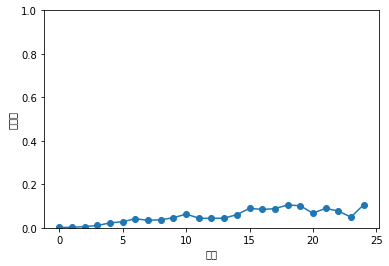

In [ ]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        # 문제에 대한 답이 정답과 같은지 검사하는 함수 
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

# 7.4 seq2seq 개선
학습 속도 개선
* 입력데이터 반전 : 변환 후 대응하는 단어와 더 가까워지므로
* 엿보기 : Decoder에서 최초의 LSTM계층 뿐만 아니라 모든 시각의 Affine 계층과 LSTM계층에도 고정길이 벡터 h를 받을 수 있게 한다.


## 7.4.1 입력데이터 반전

아래와 같이  [::-1] 를 사용하면 전체 배열을 거꾸로 출력한다.

In [ ]:
 # x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

입력 데이터 반전 시 정답률 추이

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 9.52
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 5.41
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 3.50
| 에폭 1 |  반복 61 / 351 | 시간 4[s] | 손실 2.74
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 2.27
| 에폭 1 |  반복 101 / 351 | 시간 6[s] | 손실 2.07
| 에폭 1 |  반복 121 / 351 | 시간 8[s] | 손실 1.90
| 에폭 1 |  반복 141 / 351 | 시간 9[s] | 손실 1.85
| 에폭 1 |  반복 161 / 351 | 시간 10[s] | 손실 1.78
| 에폭 1 |  반복 181 / 351 | 시간 12[s] | 손실 1.74
| 에폭 1 |  반복 201 / 351 | 시간 13[s] | 손실 1.70
| 에폭 1 |  반복 221 / 351 | 시간 14[s] | 손실 1.66
| 에폭 1 |  반복 241 / 351 | 시간 16[s] | 손실 1.63
| 에폭 1 |  반복 261 / 351 | 시간 17[s] | 손실 1.62
| 에폭 1 |  반복 281 / 351 | 시간 18[s] | 손실 1.58
| 에폭 1 |  반복 301 / 351 | 시간 20[s] | 손실 1.56
| 에폭 1 |  반복 321 / 351 | 시간 21[s] | 손실 1.53
| 에폭 1 |  반복 341 / 351 | 시간 22[s] | 손실 1.50
Q 77+85  
T 162 
☒ 127 
---
Q 975+164
T 1139
☒ 1229
---
Q 582+84 
T 666 
☒ 700 
---
Q 8+155  
T 163 
☒ 247 
---
Q 367+55 
T 422 
☒ 417 
---
Q 600+257
T 857 
☒ 1075
---
Q 761+292
T 1053
☒ 1079
---
Q 830+597
T 1427
☒ 1229
--

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

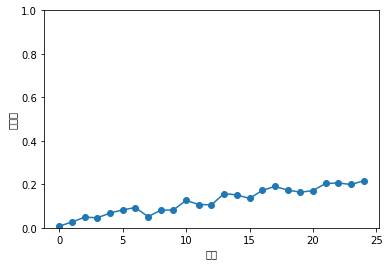

In [ ]:
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list2 = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        # 문제에 대한 답이 정답과 같은지 검사하는 함수 
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list2.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list2))
plt.plot(x, acc_list2, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

## 7.4.2 엿보기

최초 LSTM만 중요한 정보 h를 받는다.
이를 모든 시각의 Affine계층과 LSTM 계층에  h 전달

이때, LSTM과 Affine의 입력이 두개가 되는데 concate로 벡터를 합쳐서 입력한다.

?? Affine 계층에는 왜 전달하는 걸까?


In [ ]:
from common.time_layers import *

class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
                      # 인코더가 인코딩한 벡터 h가 추가 되므로 가중치 매개변수 형상이 바뀐다.
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
                      # 인코더가 인코딩한 벡터 h가 추가 되므로 가중치 매개변수 형상이 바뀐다.
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)
        out = self.embed.forward(xs)        
        hs = np.repeat(h, T, axis=0).reshape(N, T, H) # 들어온 h를 T만큼 복제하고 입력 형상에 맞게 reshape 
        out = np.concatenate((hs, out), axis=2)       # hs와 임베딩에서의 출력 out을 이어 붙인다.

        out = self.lstm.forward(out)                  # lstm에 입력


        out = np.concatenate((hs, out), axis=2)       # hs와 LSTM의 출력 out을 이어 붙인다.
        score = self.affine.forward(out)              # Affine에 입력

        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        #복제 했었으므로 기울기는 더해준다.
        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            # 순전파와 같이 임베딩 출력과 h를 붙여서 lstm에 입력
            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
           # lstm 출력과 h를 붙여서 affine에 입력
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


Peeky용 Decoder를 수정했으니, 이를 적용한 Peeky seq2seq 생성

In [ ]:
class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 4[s] | 손실 1.99
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 7[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 8[s] | 손실 1.82
| 에폭 1 |  반복 141 / 351 | 시간 9[s] | 손실 1.80
| 에폭 1 |  반복 161 / 351 | 시간 11[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 12[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 14[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 15[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 17[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 18[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 20[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 21[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 22[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 24[s] | 손실 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1013
---
Q 582+84 
T 666 
☒ 102 
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1023
---
Q 600+257
T 857 
☒ 1023
---
Q 761+292
T 1053
☒ 1023
---
Q 830+597
T 1427
☒ 1111
--

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

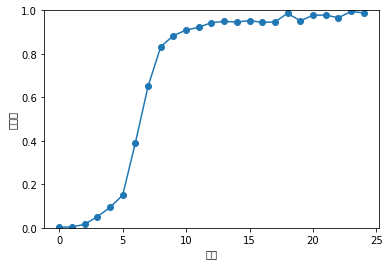

In [ ]:
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 =============================================
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 엿보기(Peeky) =====================================
model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list3 = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        # 문제에 대한 답이 정답과 같은지 검사하는 함수 
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list3.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list3))
plt.plot(x, acc_list3, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

전체 학습률 비교

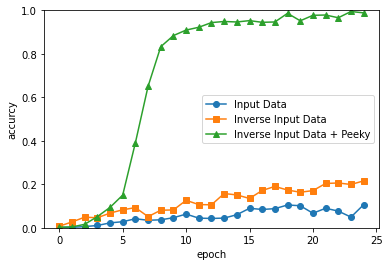

In [ ]:
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o',label='Input Data')
plt.plot(x, acc_list2, marker='s',label='Inverse Input Data')
plt.plot(x, acc_list3, marker='^',label='Inverse Input Data + Peeky')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accurcy')
plt.ylim(0, 1.0)
plt.show()

# 7.5 seq2seq를 용하는 애플리 케이션
시계열 데이터 sequence : 이미지, 문자열, 동영상
* 챗봇
* 알고리즘 학습
* 이미지(CNN) 캡셔닝